In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [2]:
data = pd.read_csv("data/DailyDelhiClimateTrain.csv")

# Plotting all information
print(data.loc[:,:])

print(data.describe())

            date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std   

In [3]:
figure1 = px.line(data,x="date",y="meantemp",title="Mean temprature in Dehli over the year")
figure1.show()

figure = px.scatter(data_frame = data, x="humidity",
                    y="meantemp", size="meantemp", 
                    title = "Relationship Between Temperature and Humidity")
figure.show()


In [32]:

forecast_data = data.rename(columns={"date":"ds","meantemp":"y"})
print(forecast_data)
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)
print(predictions)



23:13:09 - cmdstanpy - INFO - Chain [1] start processing
23:13:09 - cmdstanpy - INFO - Chain [1] done processing


              ds          y    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]
             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2013-01-01  24.654535    9.149115   14.185930    24.654535    24.654535   
1    2013-01-02  24.654

       meantemp   humidity  wind_speed  meanpressure
0     10.000000  84.500000    0.000000   1015.666667
1      7.400000  92.000000    2.980000   1017.800000
2      7.166667  87.000000    4.633333   1018.666667
3      8.666667  71.333333    1.233333   1017.166667
4      6.000000  86.833333    3.700000   1016.500000
...         ...        ...         ...           ...
1455  17.142857  74.857143    8.784211   1016.952381
1456  16.850000  67.550000    8.335000   1017.200000
1457  17.217391  68.043478    3.547826   1015.565217
1458  15.238095  87.857143    6.000000   1016.904762
1459  14.095238  89.666667    6.266667   1017.904762

[1460 rows x 4 columns]
365
             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1460 2016-12-31  27.571591   11.838918   17.080477    27.571591    27.571591   
1461 2017-01-01  27.574811   11.940462   17.035116    27.574811    27.574811   
1462 2017-01-02  27.578031   12.068929   17.100321    27.578031    27.578031   
1463 2017-01-03

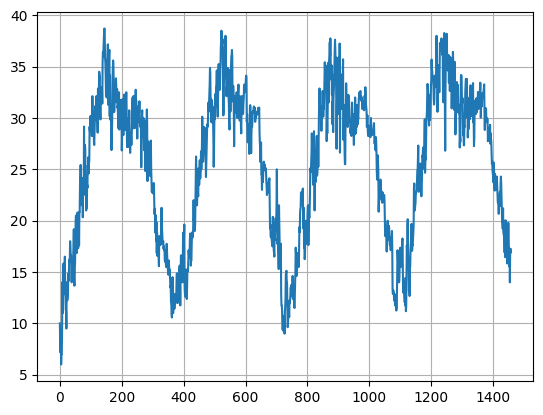

In [31]:
# Now that i've used the Meta module, let's try it with our model

# First, let's try a simple mean of those term and compare to Meta one:

data_forecast_own_model = data.iloc[:-2,1:]
print(data_forecast_own_model)

#Number of year for the data test
N_year = 4

periodicity = int(len(data_forecast_own_model)/N_year)
print(periodicity)

data_forecast_own_model_end = (data_forecast_own_model.iloc[:periodicity,:]  + data_forecast_own_model.iloc[periodicity:2*periodicity,:] + data_forecast_own_model.iloc[2*periodicity:3*periodicity,:]+ data_forecast_own_model.iloc[3*periodicity:4*periodicity,:])/N_year
data_compare = predictions.iloc[4*periodicity:-2]

print(data_compare)

RMSE_ = 0


   
